In [1]:
#importing libraries and data

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('Iris_dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#dropping ID column because it has no relevance to the prediction

data = df.drop('Id',axis=1)


## Study the data distribution in each attribute

In [3]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#checking for any null values

data.isnull().values.any()

False

In [5]:
#cheki ng the shape

data.shape

(150, 5)

## Data Visualization

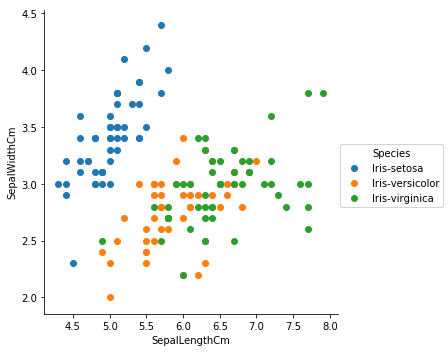

In [6]:
sns.FacetGrid(data, hue='Species',size = 5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend();
plt.show()

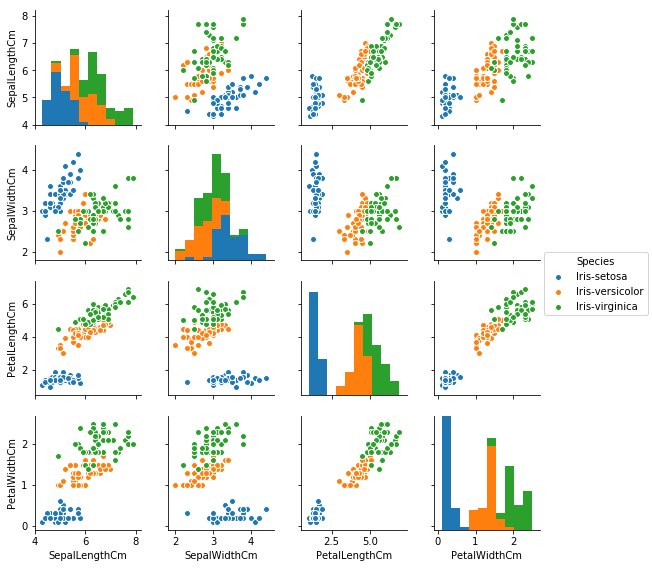

In [7]:
sns.pairplot(data, hue ='Species',size=2)

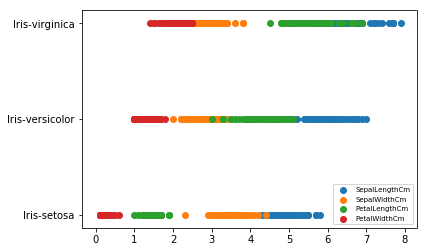

In [8]:
x = data.SepalLengthCm
y = data.Species
plt.scatter(x,y,label ='SepalLengthCm')

x = data.SepalWidthCm
y = data.Species
plt.scatter(x,y,label ='SepalWidthCm')

x = data.PetalLengthCm
y = data.Species
plt.scatter(x,y,label ='PetalLengthCm')

x = data.PetalWidthCm
y = data.Species
plt.scatter(x,y,label ='PetalWidthCm')

plt.legend(loc = 4, prop={'size':7})
plt.show()

In [9]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

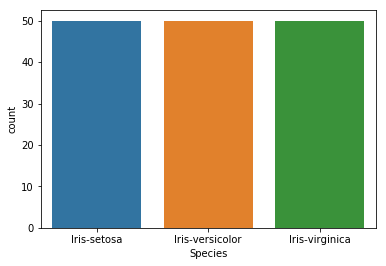

In [10]:
sns.countplot('Species', data = data)

## Model Creation & Prediction

In [11]:
#Modeling with scikit-learn

X = data.drop('Species',axis = 1)
y = data.Species

In [12]:
#Split the data into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
#Use classification models

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [14]:
#Fitting the model

LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
confusion_matrix(y_test,y_predict)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [17]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

    avg / total       0.98      0.98      0.98        45



In [18]:
accuracy_score(y_test,y_predict)

0.9777777777777777